<a href="https://colab.research.google.com/github/leorasirait58-bit/Praktikum-AI/blob/main/Proyek_AI_Kelompok1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. IMPORT LIBRARY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2. DOWNLOAD DATASET DARI KAGGLE (JIKA DI COLAB)

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip -o pima-indians-diabetes-database.zip

print("Dataset berhasil didownload & diekstrak.")


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 41.2MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            
Dataset berhasil didownload & diekstrak.


In [ ]:
# 3. LOAD DATASET

df = pd.read_csv("diabetes.csv")
print("5 Data Teratas:\n", df.head())
print("\nStatistik Deskriptif:\n", df.describe())
print("\nInformasi Data:")
print(df.info())


5 Data Teratas:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Statistik Deskriptif:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618    

Missing Value:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Jumlah Duplikasi: 0


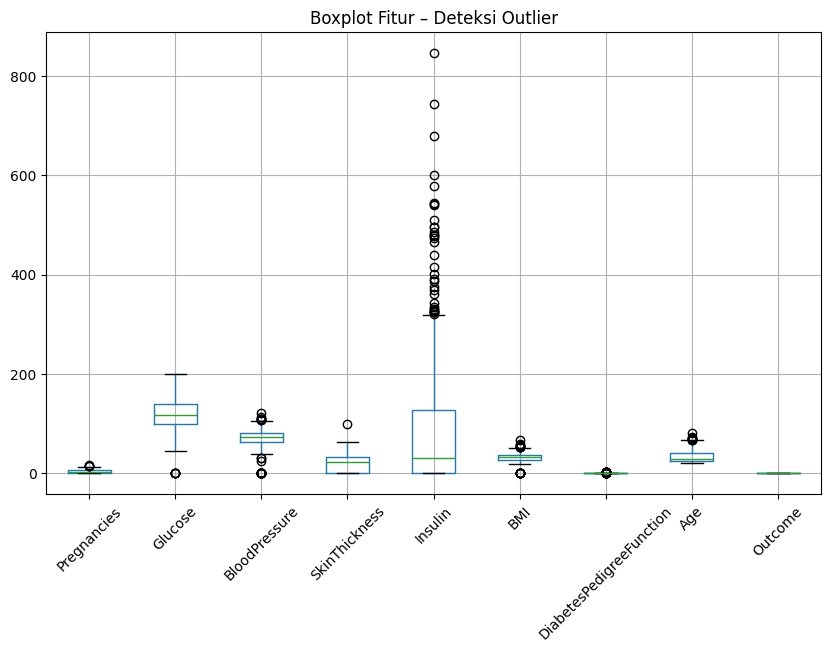


Shape X: (768, 8)
Shape y: (768,)


In [ ]:
# 4. DATA CLEANING & PREPROCESSING

# Cek missing value
print("Missing Value:\n", df.isnull().sum())

# Cek duplikasi
print("\nJumlah Duplikasi:", df.duplicated().sum())

# Menghapus duplikasi jika ada
df = df.drop_duplicates()

# Cek outlier menggunakan boxplot
plt.figure(figsize=(10,6))
df.boxplot()
plt.title("Boxplot Fitur – Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

# Normalisasi (Z-score)
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

print("\nShape X:", X_norm.shape)
print("Shape y:", y.shape)


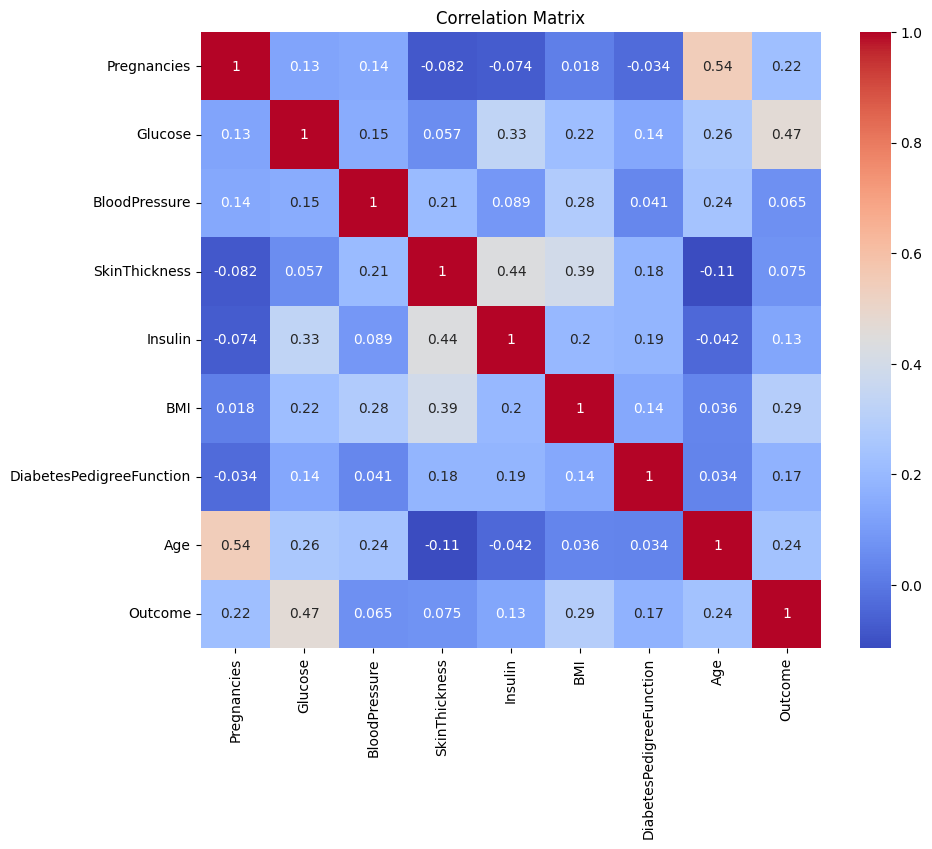

In [ ]:
# 5. ANALISIS KORELASI (NUMPY + VISUALISASI)

correlation = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# 6. ALGORITMA 1 → NUMPY SIMPLE CLASSIFIER
# (Threshold classifier berbasis mean)

class SimpleNumpyClassifier:
    def fit(self, X, y):
        self.mean_vector = X.mean(axis=0)

    def predict(self, X):
        return (np.dot(X, self.mean_vector) >= 0).astype(int)

numpy_clf = SimpleNumpyClassifier()
numpy_clf.fit(X_norm, y)
numpy_pred = numpy_clf.predict(X_norm)

print("Akurasi Simple NumPy Classifier:",
      np.mean(numpy_pred == y) * 100, "%")


Akurasi Simple NumPy Classifier: 64.0625 %


In [ ]:
import time

In [ ]:
# Algoritma 1: Simple NumPy Classifier

start_time_1 = time.time()

class SimpleNumpyClassifier:
    def fit(self, X, y):
        self.mean_vector = X.mean(axis=0)

    def predict(self, X):
        return (np.dot(X, self.mean_vector) >= 0).astype(int)

numpy_clf = SimpleNumpyClassifier()
numpy_clf.fit(X_norm, y)
pred_numpy = numpy_clf.predict(X_norm)

end_time_1 = time.time()

accuracy_numpy = np.mean(pred_numpy == y) * 100
training_time_numpy = end_time_1 - start_time_1

print("Akurasi Algoritma 1 (NumPy Classifier): {:.2f}%".format(accuracy_numpy))
print("Waktu Training Algoritma 1: {:.6f} detik".format(training_time_numpy))


Akurasi Algoritma 1 (NumPy Classifier): 64.06%
Waktu Training Algoritma 1: 0.000501 detik


In [ ]:
#  7. ALGORITMA 2 → McCulloch-Pitts Neuron

class McCullochPitts:
    def __init__(self, threshold=0.5):
        self.threshold = threshold
        self.weights = None

    def fit(self, X, y):
        # Menggunakan korelasi fitur sebagai bobot
        self.weights = np.array([
            np.corrcoef(X[:, i], y)[0,1]
            for i in range(X.shape[1])
        ])
        # Normalisasi bobot
        self.weights = self.weights / np.linalg.norm(self.weights)

    def predict(self, X):
        activation = np.dot(X, self.weights)
        return (activation >= self.threshold).astype(int)

mcp = McCullochPitts()
mcp.fit(X_norm, y)
mcp_pred = mcp.predict(X_norm)

print("Akurasi McCulloch-Pitts:", np.mean(mcp_pred == y) * 100, "%")


Akurasi McCulloch-Pitts: 75.26041666666666 %


In [ ]:
# Algoritma 2: McCulloch-Pitts

start_time_2 = time.time()

class McCullochPitts:
    def __init__(self, threshold=0.5):
        self.threshold = threshold
        self.weights = None

    def fit(self, X, y):
        self.weights = np.array([np.corrcoef(X[:, i], y)[0, 1] for i in range(X.shape[1])])
        self.weights = self.weights / np.linalg.norm(self.weights)

    def predict(self, X):
        activation = np.dot(X, self.weights)
        return (activation >= self.threshold).astype(int)

mcp = McCullochPitts()
mcp.fit(X_norm, y)
pred_mcp = mcp.predict(X_norm)

end_time_2 = time.time()

accuracy_mcp = np.mean(pred_mcp == y) * 100
training_time_mcp = end_time_2 - start_time_2

print("Akurasi Algoritma 2 (McCulloch-Pitts): {:.2f}%".format(accuracy_mcp))
print("Waktu Training Algoritma 2: {:.6f} detik".format(training_time_mcp))


Akurasi Algoritma 2 (McCulloch-Pitts): 75.26%
Waktu Training Algoritma 2: 0.002703 detik


In [ ]:
# Tabel Performa Dua Algoritma

performance_table = pd.DataFrame({
    "Algoritma": ["NumPy Classifier", "McCulloch-Pitts"],
    "Akurasi (%)": [accuracy_numpy, accuracy_mcp],
    "Waktu Training (detik)": [training_time_numpy, training_time_mcp]
})

performance_table


,Algoritma,Akurasi (%),Waktu Training (detik)
0,NumPy Classifier,64.062500,0.000501
1,McCulloch-Pitts,75.260417,0.002703


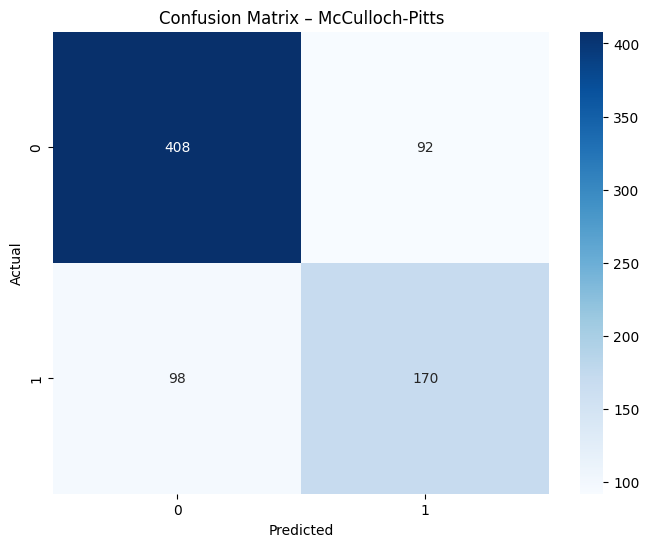


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.81      0.82      0.81       500
    Diabetes       0.65      0.63      0.64       268

    accuracy                           0.75       768
   macro avg       0.73      0.73      0.73       768
weighted avg       0.75      0.75      0.75       768



In [ ]:
# 8. CONFUSION MATRIX & CLASSIFICATION REPORT

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y, mcp_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – McCulloch-Pitts")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y, mcp_pred,
                            target_names=["No Diabetes", "Diabetes"]))


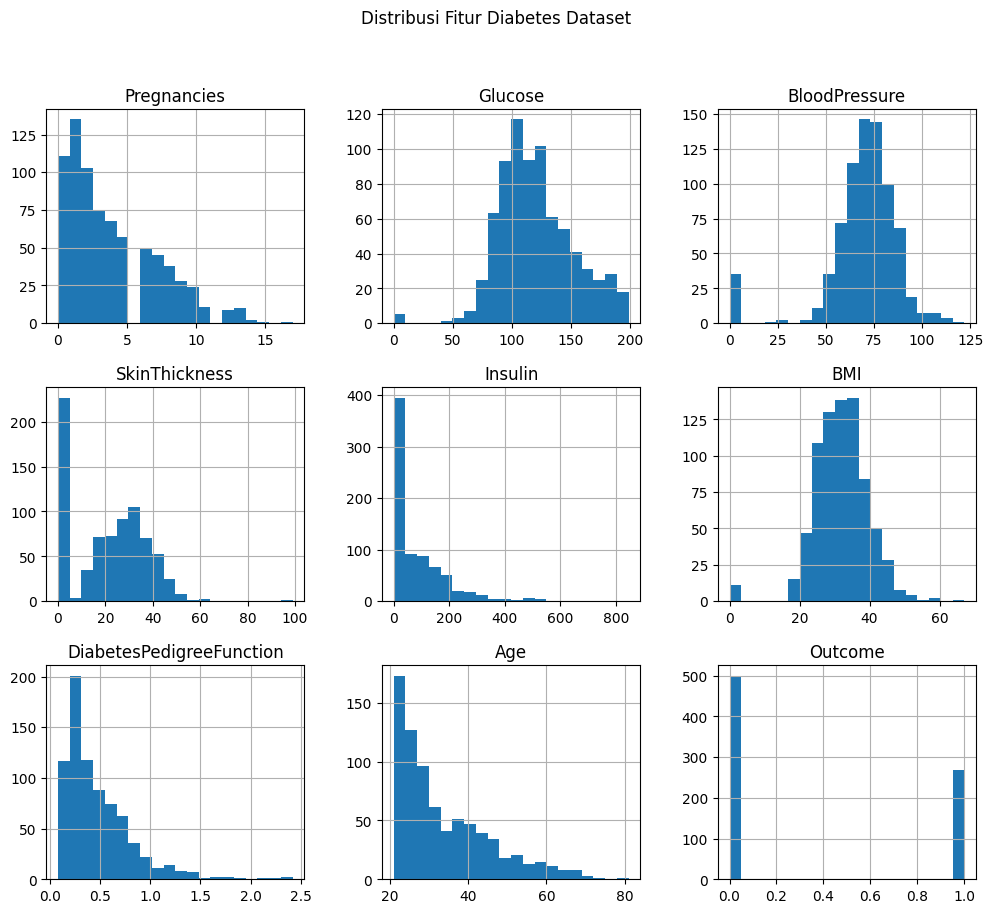

In [ ]:
# 9. VISUALISASI TAMBAHAN (Distribution Plot)

df.hist(figsize=(12,10), bins=20)
plt.suptitle("Distribusi Fitur Diabetes Dataset")
plt.show()
